# Cuidado con los formatos, habría que exportar todo a Mono - 32bit float
Notebook para generar las señales sintéticas

In [116]:
import numpy as np
import wave
from scipy import signal
from scipy.fft import fft, ifft
from IPython.display import Image
from scipy.io.wavfile import write, read
import struct
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import sounddevice as sd
import soundfile as sf
from pydub import AudioSegment, effects  

Configuro el sistema para generar las señales

In [ ]:
# Se utiliza una frecuencia de muestreo de 48KHz al ser la nativa de las placas de audio.
fs = 48e3
# tiempo en segundos
time_frame = 10  


# A - Señal de voz

/var/folders/_t/g_d_mdfj26jg8hrgxw05jn6w0000gn/T/ipykernel_20808/2491561978.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x_speech = read('../PASA-TP2/audio/x_speech.wav')


Text(0, 0.5, 'Amplitud')

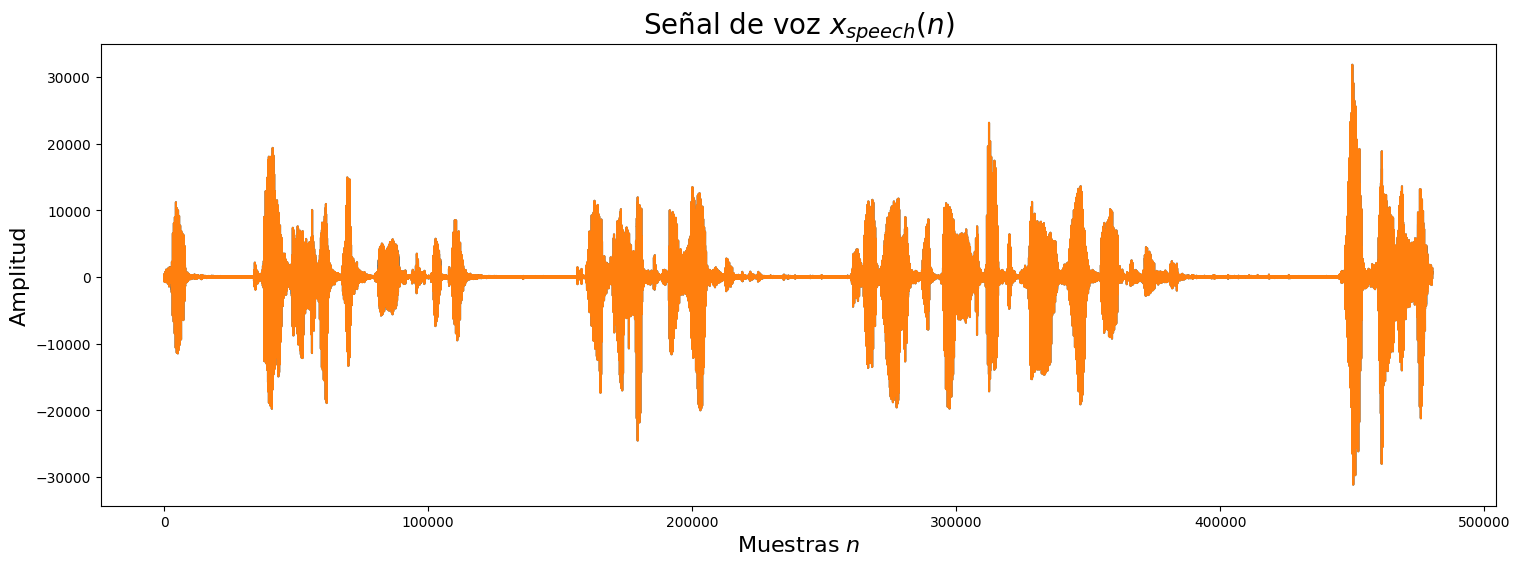

In [146]:
fs, x_speech = read('../PASA-TP2/audio/x_speech.wav')
plt.figure(figsize=(18, 6))
plt.plot(x_speech)
plt.title('Señal de voz $x_{speech}(n)$', fontsize=20)
plt.xlabel('Muestras $n$', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)

# C - Señal Rectangular

In [118]:
# Defino la frecuencia de la señal cuadrada
frequency = 100  # frecuencia en Hz

#Defino el tiempo de muestreo y la cantidad de muestras

num_samples = int(fs * time_frame)
t= np.linspace(0, time_frame, num_samples, endpoint=False)

# Genero la señal cuadrada usando la función signal.square de scipy
square_wave = signal.square(2 * np.pi * frequency * t)

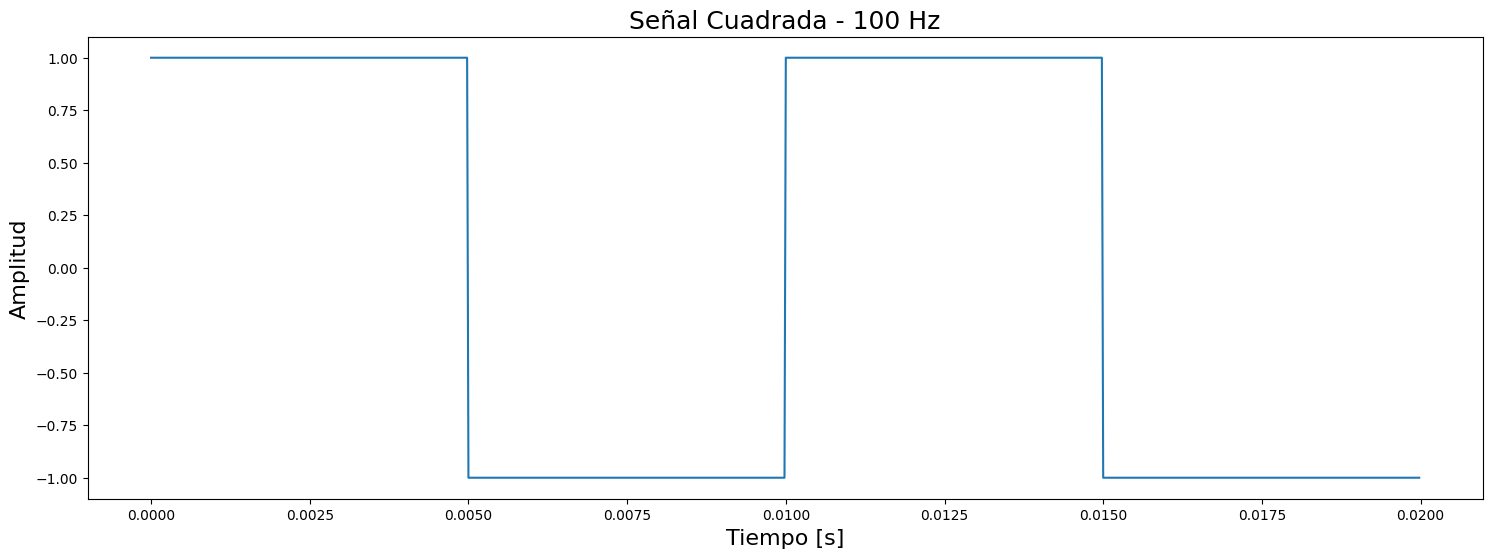

In [119]:
#Ploteo la señal
plt.figure(figsize=(18, 6))
plt.plot(t[:int(2*fs/frequency)],square_wave[:int(2*fs/frequency)])
#plt.grid()
plt.title('Señal Cuadrada - 100 Hz', fontsize=18)
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.show()

Analizo la respuesta es frecuencia de la señal generada para validar la sintesis de la señal deseada.

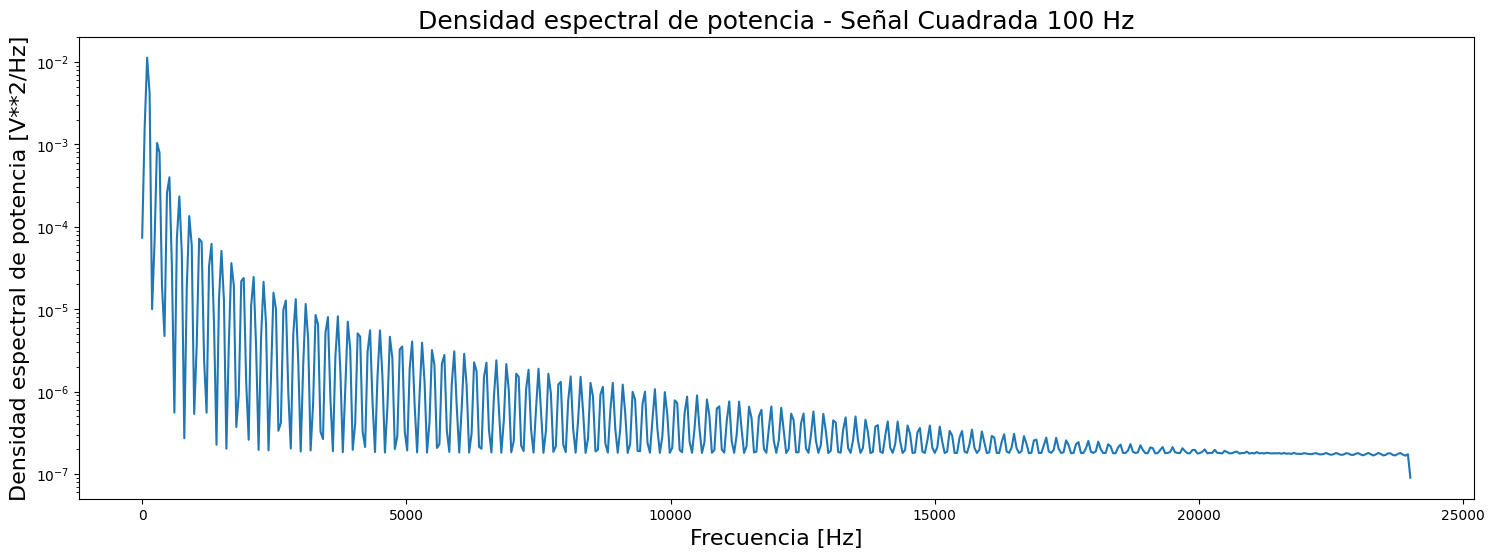

In [144]:
frec_s, psd = signal.welch(square_wave, fs, nperseg=1024)
plt.figure(figsize=(18, 6))
plt.semilogy(frec_s, psd)
plt.title('Densidad espectral de potencia - Señal Cuadrada 100 Hz', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Densidad espectral de potencia [V**2/Hz]', fontsize=16)
plt.show()

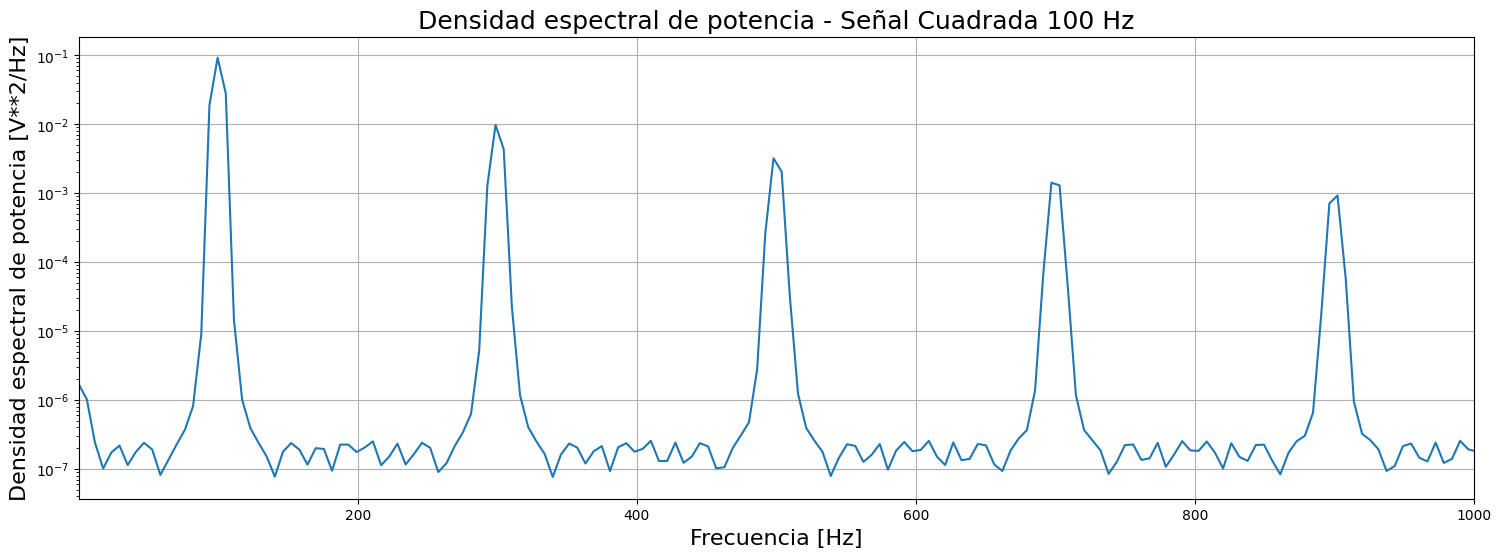

In [121]:
frec_s, psd = signal.welch(square_wave, fs, nperseg=8192)
plt.figure(figsize=(18, 6))
plt.semilogy(frec_s, psd)
plt.title('Densidad espectral de potencia - Señal Cuadrada 100 Hz', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Densidad espectral de potencia [V**2/Hz]', fontsize=16)
ylim = plt.xlim(0.1, 1e3)
plt.grid()
plt.show()

Se puede apreciar correctamente la frecuencia fundamental asi como también sus armónicos inpares. Se concluye que la señal se generó correctamente y se procede a guardarla.

Guardo la señal generada


In [122]:
# Guardar la señal cuadrada como archivo WAV
write('../PASA-TP2/audio/prueba_square.wav', int(fs), square_wave.astype(np.float32))
print("Archivo guardado exitosamente en: ../audio/prueba_square.wav")

Archivo guardado exitosamente en: ../audio/prueba_square.wav


Escucho la señal generada

In [123]:
ipd.Audio(square_wave, rate=int(fs))

## D - Linear swept

Se genera un barrido lineal de frecuencia con $f_o$ = 20 Hz y $f_1$ =20 kHz.

In [124]:
f1=20
f2=20e3
k=(f2-f1)/time_frame
t = np.linspace(0, time_frame, num_samples, endpoint=False)
linear_swept = np.sin((2 * np.pi * f1 * t)+(2 * np.pi * k * (t*t)/2))

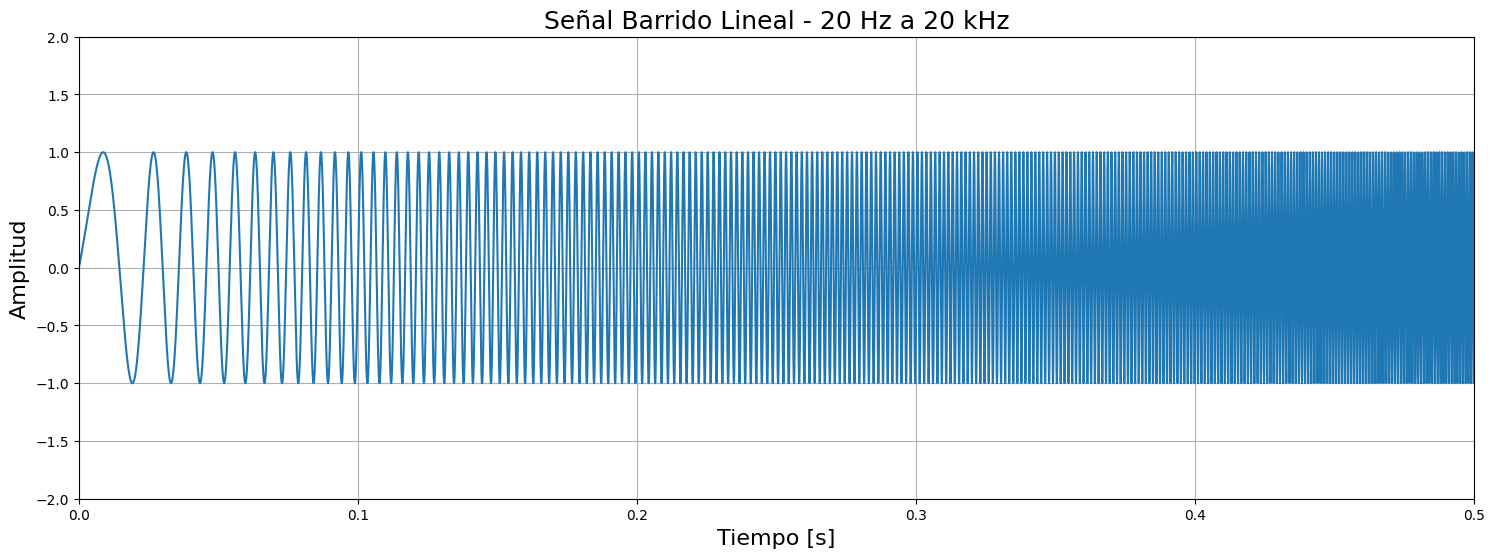

In [125]:
plt.figure(figsize=(18, 6))
plt.plot(t,linear_swept)
plt.ylim(-2, 2)
plt.xlim(0,0.5)
plt.title('Señal Barrido Lineal - 20 Hz a 20 kHz', fontsize=18)
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()
plt.show()

Analizo la respuesta es frecuencia de la señal generada para validar la sintesis de la señal deseada.

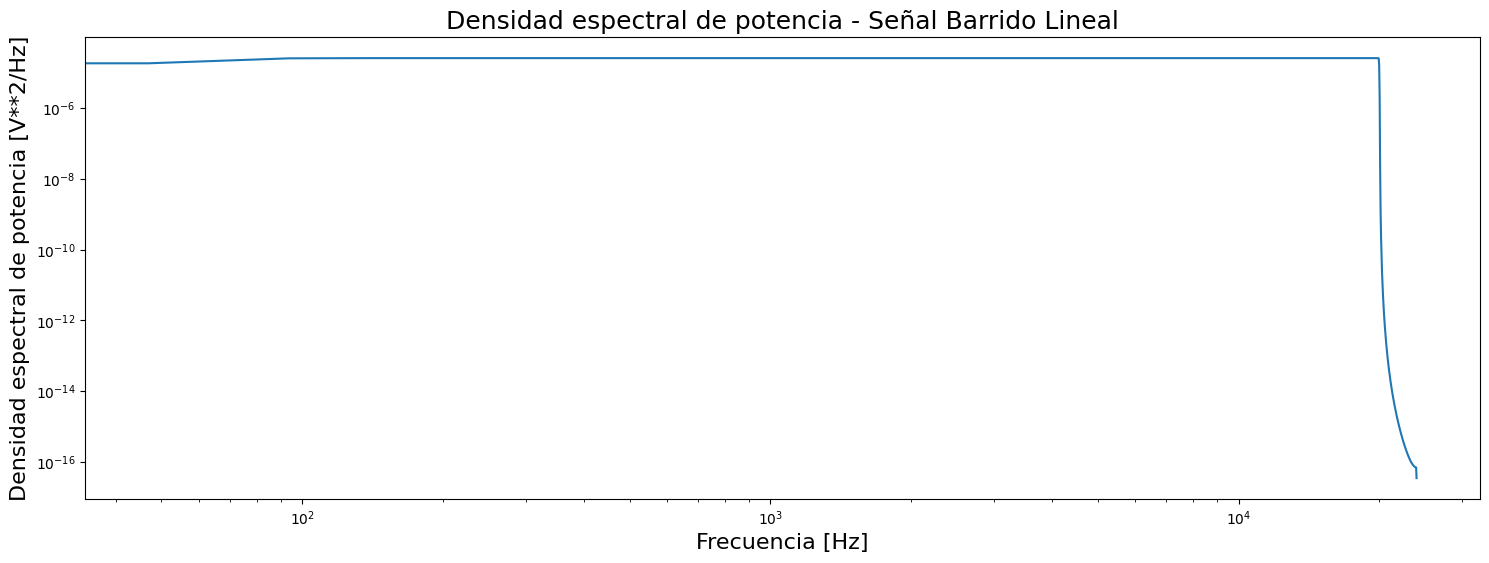

In [126]:
frec_s, psd = signal.welch(linear_swept, fs, nperseg=1024)
plt.figure(figsize=(18, 6))
plt.semilogy(frec_s, psd)
plt.title('Densidad espectral de potencia - Señal Barrido Lineal', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Densidad espectral de potencia [V**2/Hz]', fontsize=16)
plt.loglog()
plt.show()

Se puede apreciar el comportamiento esperado con contenido espectral de igual magnitud para todo el barrido.

Procedo a guardar la señal.

In [127]:
# Guardar la señal de barrido lineal como archivo WAV
write('../PASA-TP2/audio/prueba_linear_swept.wav', int(fs), linear_swept.astype(np.float32))
print("Archivo guardado exitosamente en: ../audio/prueba_linear_swept.wav")

Archivo guardado exitosamente en: ../audio/prueba_linear_swept.wav


Reproduzco la señal generada.

In [128]:
ipd.Audio(linear_swept, rate=int(fs))

# E - Log Swept 

Se genera un barrido logarítmico de frecuencia con $f_o$ = 20 Hz y $f_1$ =20 kHz.

In [129]:
f1=20
f2=20e3
k= np.log(f2/f1)/time_frame
t = np.linspace(0, time_frame, num_samples, endpoint=False)
log_swept = np.sin((2 * np.pi * f1 * (np.exp(k * t)-1))/k)

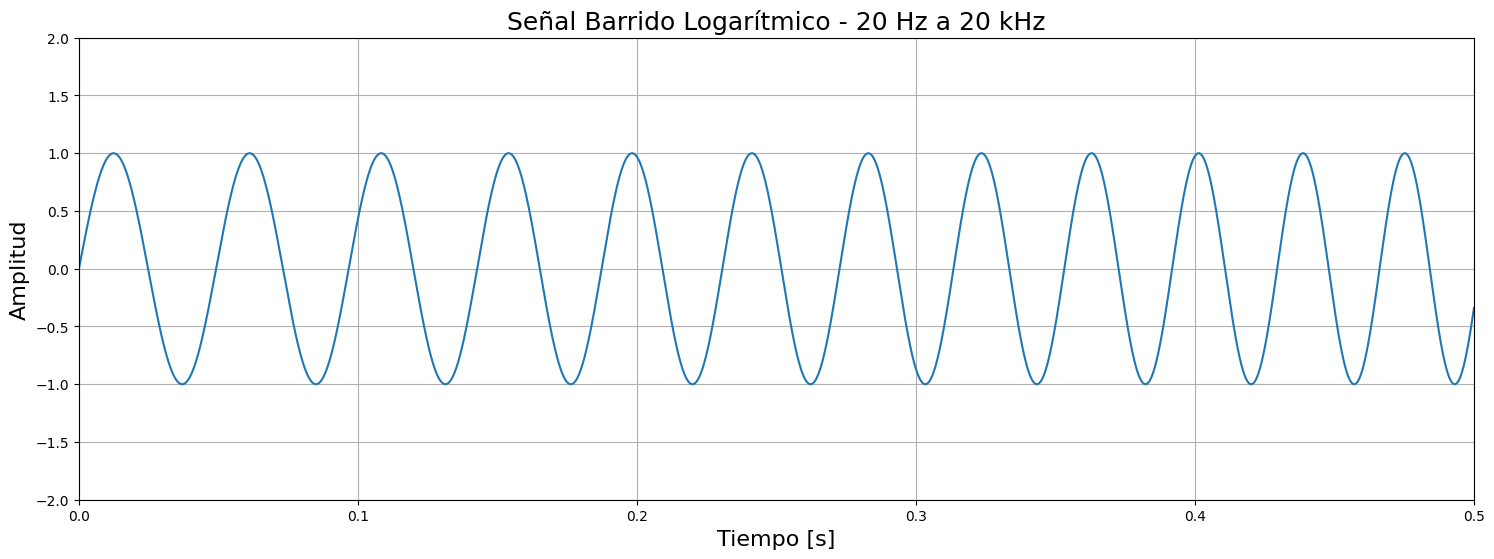

In [130]:
plt.figure(figsize=(18, 6))
plt.plot(t,log_swept)
plt.ylim(-2, 2)
plt.xlim(0,0.5)
plt.title('Señal Barrido Logarítmico - 20 Hz a 20 kHz', fontsize=18)
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.grid()
plt.show()

Ahora analizamos la PSD de la señal sintetizada.

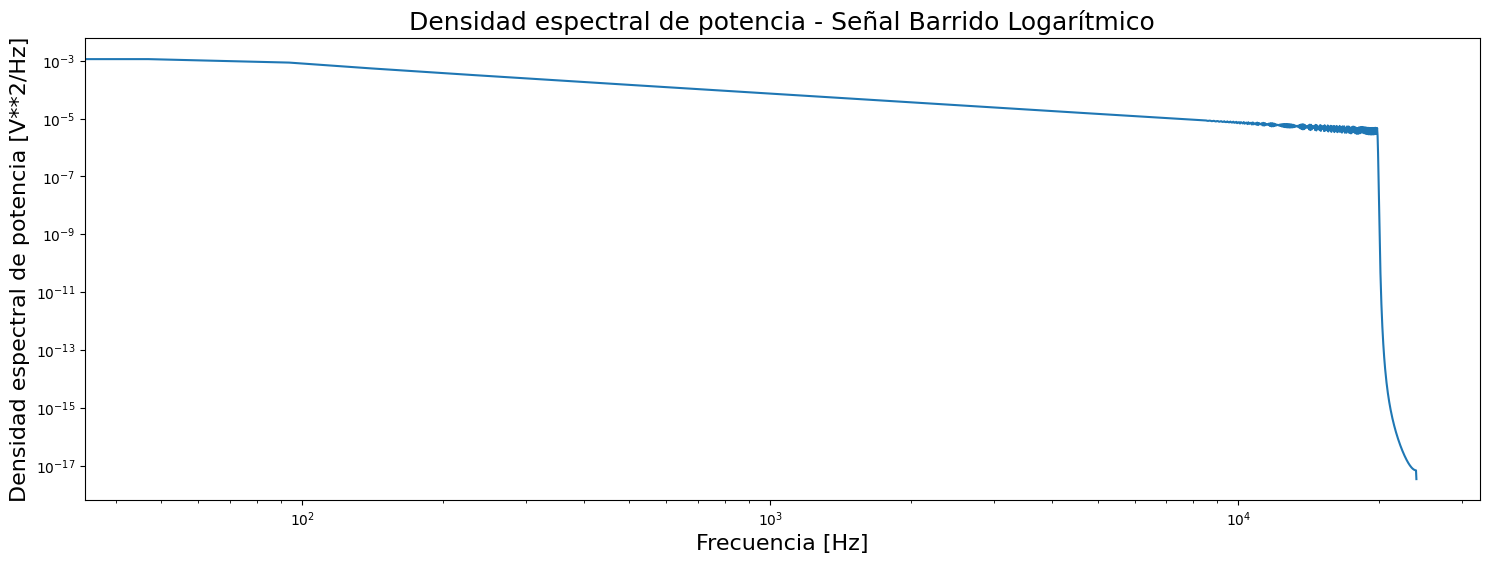

In [131]:
frec_s, psd = signal.welch(log_swept, fs, nperseg=1024)
plt.figure(figsize=(18, 6))
plt.semilogy(frec_s, psd)           
plt.title('Densidad espectral de potencia - Señal Barrido Logarítmico', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Densidad espectral de potencia [V**2/Hz]', fontsize=16)
plt.loglog()
plt.show()

Tiene el espectro esperado con una mayor concentración a menores frecuencias debido al recorrido logarítmico.

Se procede a guardar la señal.

In [132]:
#Guardar la señal de barrido logaritmico como archivo WAV
write('../PASA-TP2/audio/prueba_log_swept.wav', int(fs), log_swept.astype(np.float32))
print("Archivo guardado exitosamente en: ../PASA-TP2/audio/prueba_log_swept.wav")

Archivo guardado exitosamente en: ../PASA-TP2/audio/prueba_log_swept.wav


Escuchamos la señal sintetizada.

In [133]:
ipd.Audio(log_swept, rate=int(fs))

# Ruido gausseano de media cero

In [134]:
#Definimos los parámetros del ruido
mu = 0       # Media
sigma = 1  # Desviación estándar

# Muestramos el ruido blanco
noise = np.random.normal(mu, sigma, num_samples)

Grafico la señal

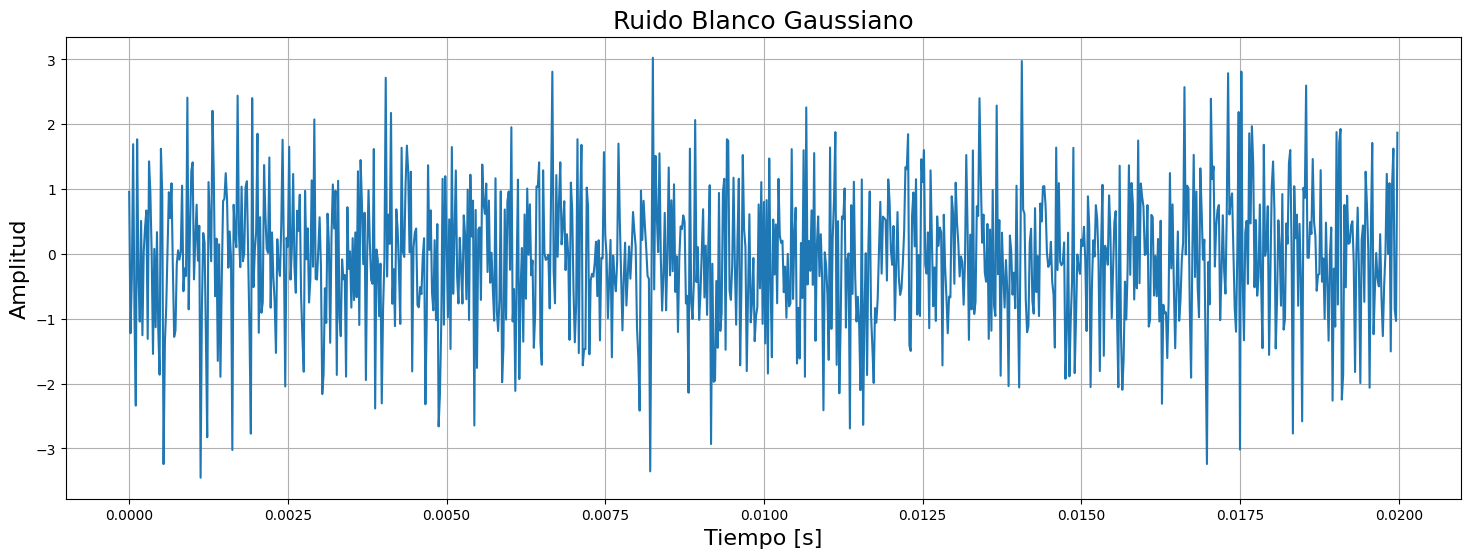

In [135]:
plt.figure(figsize=(18, 6))
plt.plot(t[:int(2*fs/frequency)],noise[:int(2*fs/frequency)])
plt.grid()
plt.title('Ruido Blanco Gaussiano', fontsize=18)
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.show()

Analizo el espectro del ruido blanco generado.

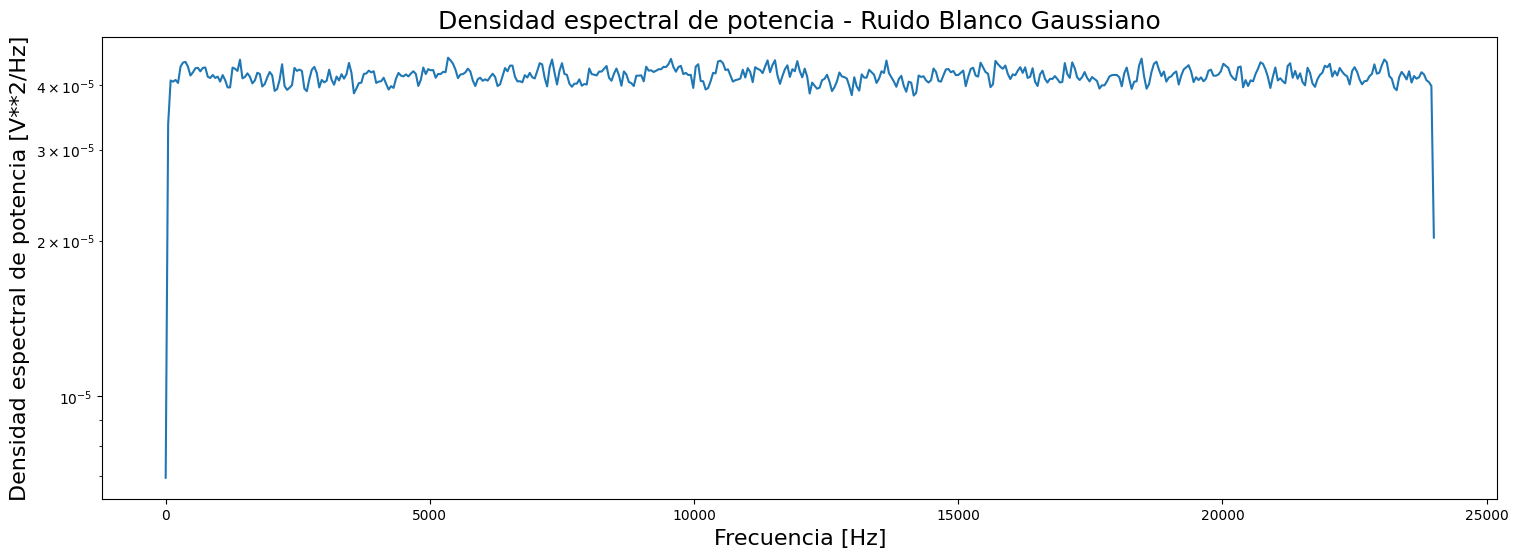

In [136]:
f,psd = signal.welch(noise, fs, nperseg=1024)
plt.figure(figsize=(18, 6))
plt.semilogy(f, psd)
plt.title('Densidad espectral de potencia - Ruido Blanco Gaussiano', fontsize=18)
plt.xlabel('Frecuencia [Hz]', fontsize=16)
plt.ylabel('Densidad espectral de potencia [V**2/Hz]', fontsize=16)
plt.show()

El resultado es consistente, obteniendo un espectro plano. Procedemos a guardar la señal sintetizada.

In [137]:
write('../PASA-TP2/audio/prueba_noise.wav', int(fs), noise.astype(np.float32))
print("Archivo guardado exitosamente en: ../PASA-TP2/audio/prueba_noise.wav")

Archivo guardado exitosamente en: ../PASA-TP2/audio/prueba_noise.wav


Escuchamos la señal sintetizada.

In [138]:
ipd.Audio(noise, rate=int(fs))